In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import shap

In [30]:
# 创建三分类数据集
X, y = make_classification(
    n_samples=1000,       # 样本数
    n_features=10,        # 特征数
    n_informative=5,      # 有信息量的特征
    n_classes=3,          # 分类数
    random_state=42
)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 转为 DataFrame 以便展示
feature_names = [f"Feature {i}" for i in range(X.shape[1])]
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

In [31]:
# 创建随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# 创建 SHAP explainer
explainer = shap.TreeExplainer(clf)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test)

print(shap_values.shape)

# 打印 SHAP 值的形状（每个类别的 SHAP 值）
print([sv.shape for sv in shap_values])

print(shap_values[:,:,0].shape)

(300, 10, 3)
[(10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 3), (10, 

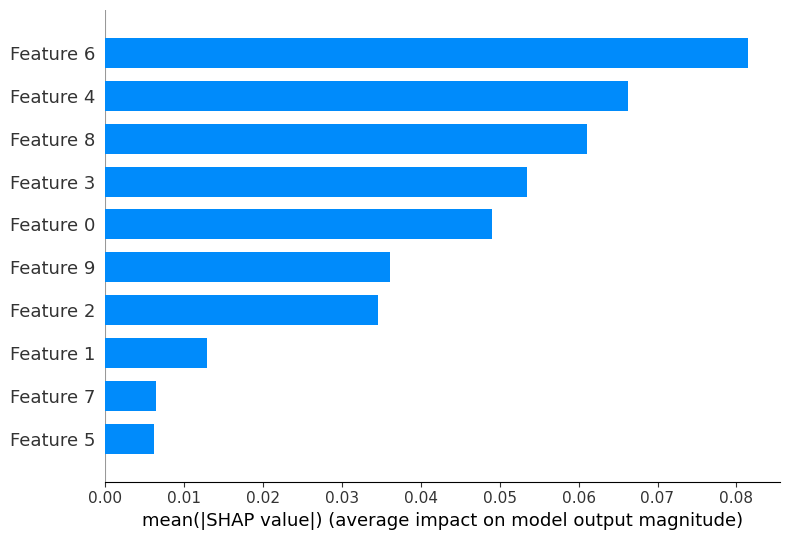

In [49]:
# 选择第一个类别进行分析
shap.summary_plot(shap_values[:,:,2], X_test, plot_type="bar", class_names=clf.classes_)

SHAP for class 0


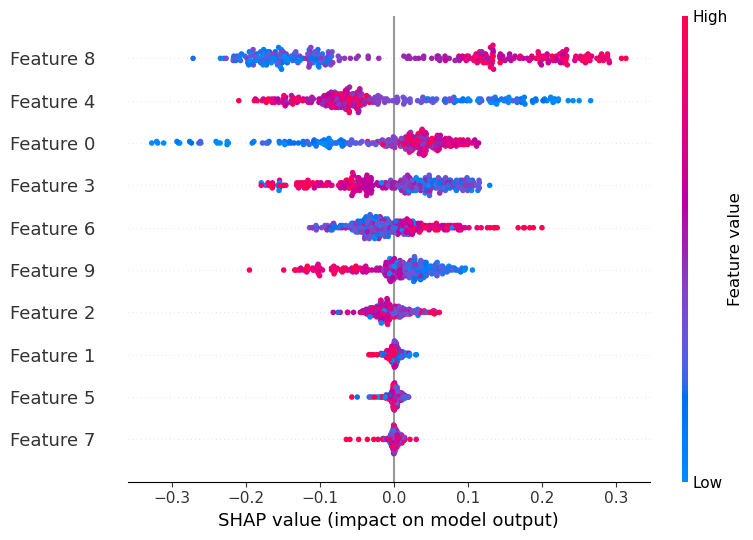

SHAP for class 1


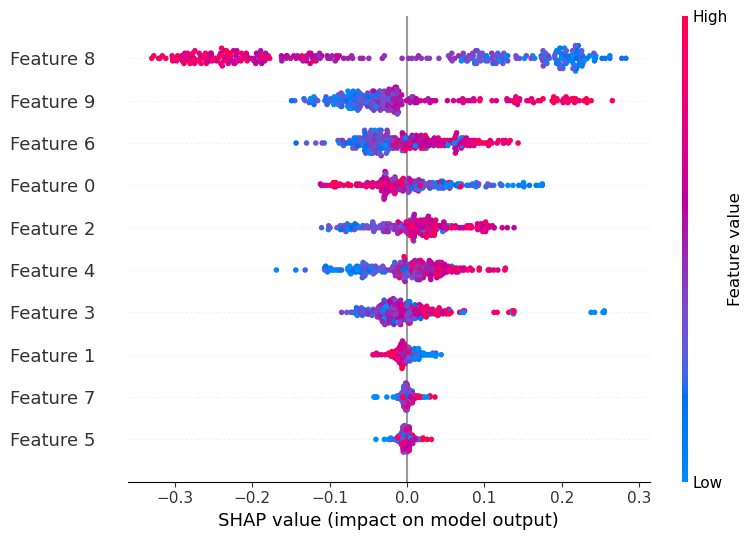

SHAP for class 2


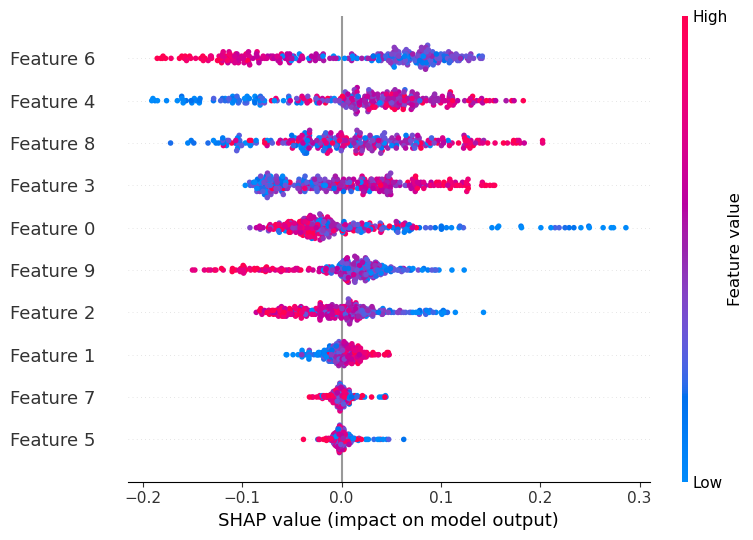

In [48]:
for i, class_name in enumerate(clf.classes_):
    print(f"SHAP for class {class_name}")
    shap.summary_plot(shap_values[:,:,i], X_test)

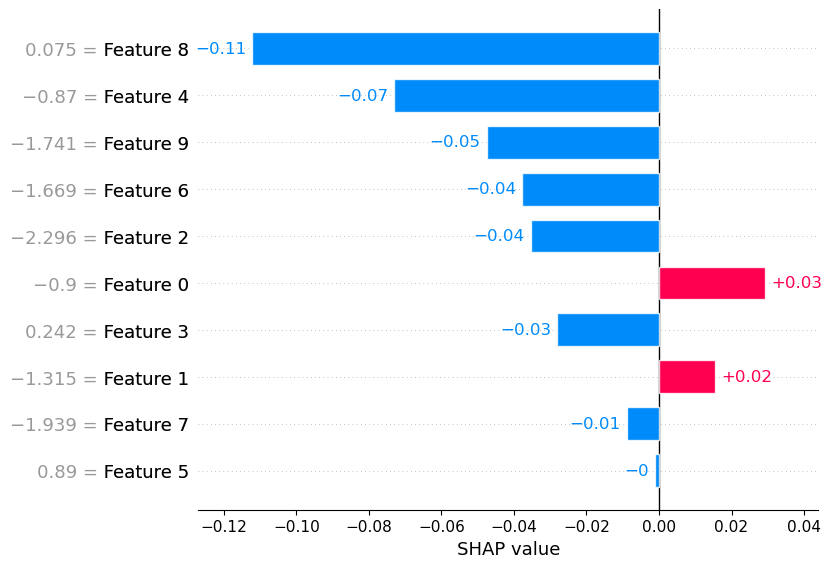

In [65]:
shap_values2 = explainer(X_test)
shap.plots.bar(shap_values2[0,:,1],show_data = True)

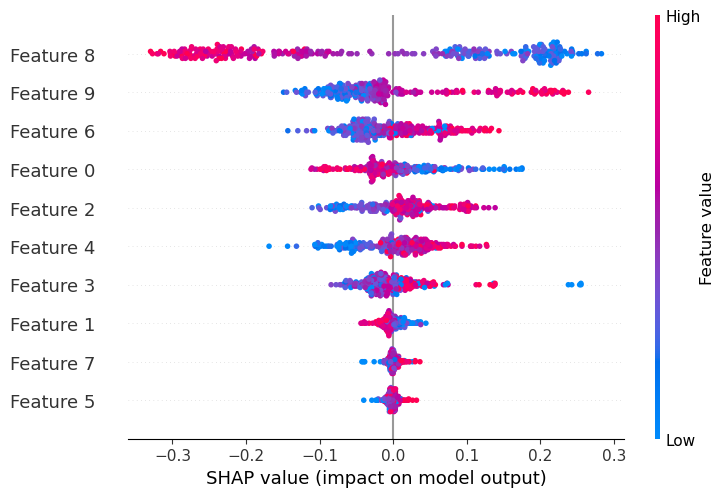

['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9']


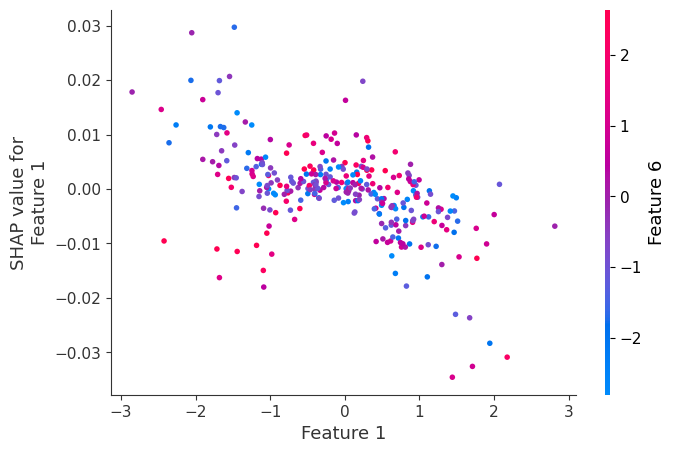

In [70]:
print(feature_names)
shap.dependence_plot('Feature 1',shap_values[:,:,0], X_test)

In [73]:
shap.plots.heatmap(shap_values2)

DimensionError: The hclust order only supports 2D arrays right now!